### Задание 7

26 вариант

In [98]:

import matplotlib.pyplot as plt
from math import sqrt, sin, cos, exp, acos, asin
from typing import Tuple

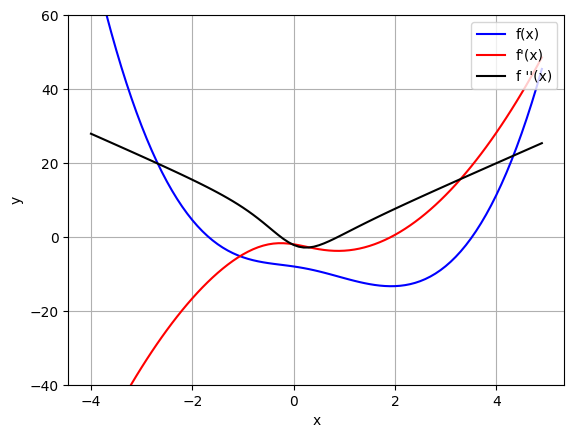

In [99]:
%matplotlib inline
# %matplotlib widget

plt.close()

EPSILON = 0.000001

def fun(x: float) -> float:
    return x**2 * sqrt(x**2 + 2) - (2 * x + 5) * sqrt(x**2 + 1) - 3

def d_fun(x: float) -> float:
    return (2 * x * sqrt(x**2 + 2) + x**3/sqrt(x**2 + 2)
            - 2 * sqrt(x**2 + 1) - x * (2 * x + 5) / sqrt(x**2 + 1))

def d2_fun(x: float) -> float:
    return (2 * sqrt(x**2 + 2)
            + 5 * x**2 / sqrt(x**2 + 2)
            - x**4 / (x**2 + 2)**1.5
            - (6 * x + 5) / sqrt(x**2 + 1)
            + x * (2 * x**2 + 5 * x) / (x**2 + 1)**1.5)


x_val = [x/10.0 for x in range(-40, 50)]
y_val = [fun(x) for x in x_val]

plt.plot(x_val, y_val, label = "f(x)", c='b')
plt.grid()
plt.xlabel("x")
plt.ylabel("y")


x_val = [x/10.0 for x in range(-40, 50)]
y_val = [d_fun(x) for x in x_val]
plt.plot(x_val, y_val, label = 'f\'(x)', c='r')

x_val = [x/10.0 for x in range(-40, 50)]
y_val = [d2_fun(x) for x in x_val]

plt.plot(x_val, y_val, label = "f ''(x)", c='black')
plt.ylim(-40, 60)
plt.legend(loc = 'upper right')
plt.show()

***Метод простой итерации***

In [100]:
# 𝑓(𝑎)∙𝑓(𝑏)<0; 𝑓′(𝑥)≠0
def necessary_condition(a: float, b: float, fun=fun, d_fun=d_fun) -> bool:
    if fun(a) * fun(b) > 0 or abs(d_fun(a)) < 0.00001 or abs(d_fun(b))  < 0.00001:
        return False
    return True

In [101]:
def phi(x: float, _lambda: float) -> float:
    return x - _lambda * fun(x)

def min_lamda(a: float, b: float, c: float):
    if abs(a) > abs(b):
        if abs(b) > abs(c): return c
        else: return b
    else:
        if abs(a) > abs(c): return c
        else: return a


def sufficient_condition_d_phi(a: float, b: float, _lambda: float, d_fun=d_fun) -> bool:
    # |1 + λ * fun(x)'| < 1 on [a, b]
    if not abs(1 - _lambda * d_fun(b)) < 1:
        return False
    if not abs(1 - _lambda * d_fun(a)) < 1:
        return False
    return True

def simple_iteration(
        a: float, b: float,_lambda: float, eps: float = EPSILON,
        phi=phi, fun=fun, d_fun=d_fun
    ) -> Tuple[float, int]:
    if a > b: a, b = b, a
    # 𝑓(𝑎)∙𝑓(𝑏)<0; 𝑓′(𝑥)≠0
    if not necessary_condition(a, b, fun, d_fun):
        raise ValueError("Method doesn't converge")
    si_lambda = min_lamda(_lambda, 1/d_fun(a), 1/d_fun(b))
    if abs(si_lambda) > 0.5: 
        raise ValueError("Lambda is too big")
    # |1 + λ * fun(x)'| < 1 on [a, b]
    if not sufficient_condition_d_phi(a, b, si_lambda, d_fun):
        print("\nWarning: sufficient condition not satisfied.\nConvergence not guaranteed.")

    previous = a
    x_i = a
    MAX_ITERATION = 1000
    curr_iteration = 0
    while True:
        previous, x_i = x_i, phi(x_i, si_lambda)
        curr_iteration += 1
        if not abs(x_i - previous) > eps and curr_iteration < MAX_ITERATION: break
    
    return (x_i, curr_iteration)

print("Simple Iteration Method Results:")
print("=" * 50)
print(f"{'Root':<6} {'Value':<15} {'Iterations':<10}")
print(f"{'1':<6} {(r1 := simple_iteration(-3, 0, -1/20))[0]:<15.8f} {r1[1]:<10}")
print(f"f(x) = {fun(r1[0])}")
print(f"{'2':<6} {(r2 := simple_iteration(3, 4, 1/30))[0]:<15.8f} {r2[1]:<10}")
print(f"f(x) = {fun(r2[0])}")

Simple Iteration Method Results:
Root   Value           Iterations
1      -1.68069739     30        
f(x) = 2.16843643290332e-05
2      3.52285864      14        
f(x) = -9.756334947041978e-06


***Метод Ньютона***

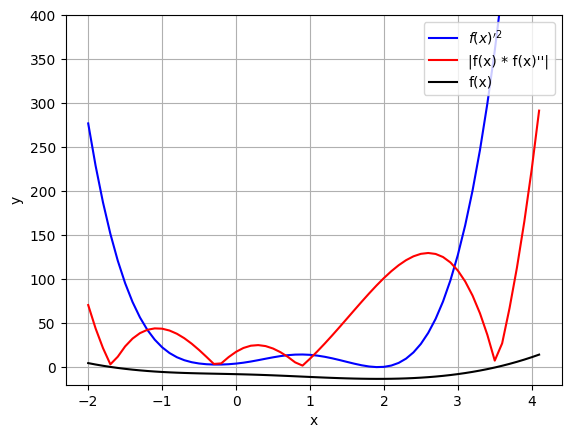

In [102]:
%matplotlib inline
# %matplotlib widget

plt.close()

x_val = [x/10.0 for x in range(-20, 42)]
y_val = [d_fun(x) ** 2 for x in x_val]
plt.plot(x_val, y_val, label = r"$f(x)'^{2}$", c='b')

x_val = [x/10.0 for x in range(-20, 42)]
y_val = [abs(d2_fun(x) * fun(x)) for x in x_val]
plt.plot(x_val, y_val, label = "|f(x) * f(x)''|", c='r')

x_val = [x/10.0 for x in range(-20, 42)]
y_val = [fun(x) for x in x_val]
plt.plot(x_val, y_val, label = 'f(x)', c='black')

plt.grid()
plt.ylim(-20, 400)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 'upper right')
plt.show()

In [103]:
def sufficient_condition_newton(a: float, b: float, fun=fun, d_fun=d_fun, d2_fun=d2_fun):
    # |f(x) * f''(x)| < f'(x) ^ 2 on [a, b]
    if not abs(fun(a) * d2_fun(a)) < d_fun(a) ** 2:
        return False
    if not abs(fun(b) * d2_fun(b)) < d_fun(b) ** 2:
        return False
    return True

# x_start = f(a) * f''(a) > 0 ? a : f(b) * f''(b) > b : b : -- sign f'/''- const
def newton_method(
        a: float, b: float, eps: float = EPSILON,
        fun=fun, d_fun=d_fun, d2_fun=d2_fun
    ) -> Tuple[float, int]:
    if a > b: a, b = b, a

    # 𝑓(𝑎)∙𝑓(𝑏)<0; 𝑓′(𝑥)≠0
    if not necessary_condition(a, b, fun, d_fun):
        raise ValueError("Method doesn't converge")
    # |f(x) * f''(x)| < f'(x) ^ 2
    if not sufficient_condition_newton(a, b, fun, d_fun, d2_fun):
        print("\nWarning: sufficient condition not satisfied.\nConvergence not guaranteed.")

    x_i = 0.1
    previous = 0.1

    if fun(a) * d2_fun(a) > 0: x_i = a
    elif fun(b) * d2_fun(b) > 0: x_i = b

    MAX_ITERATION = 1000
    curr_iteration = 0
    while True:
        previous = x_i
        # (xi - xi_-1) * fun'(xi-1) = fun(xi)
        x_i = previous - fun(previous) / d_fun(previous)
        curr_iteration += 1
        if not abs(x_i - previous) > eps and curr_iteration < MAX_ITERATION: break
    return x_i, curr_iteration

print("Newton's Method Results:")
print("=" * 50)
print(f"{'Root':<6} {'Value':<15} {'Iterations':<10}")
print(f"{'1':<6} {(r1 := newton_method(-2, -1.3))[0]:<15.8f} {r1[1]:<10}")
print(f"f(x) = {fun(r1[0])}")
print(f"{'2':<6} {(r2 := newton_method(3, 4))[0]:<15.8f} {r2[1]:<10}")
print(f"f(x) = {fun(r2[0])}")

Newton's Method Results:
Root   Value           Iterations
1      -1.68069559     4         
f(x) = 2.8337332480532496e-12
2      3.52285914      5         
f(x) = 7.105427357601002e-15


***Метод секущих***

In [104]:
def secant_method(
        a:float, b: float, eps: float = EPSILON, fun=fun, d_fun=d_fun, d2_fun=d2_fun
    ) -> Tuple[float, int]:
    if a > b: a, b = b, a

    # 𝑓(𝑎)∙𝑓(𝑏)<0; 𝑓′(𝑥)≠0
    if not necessary_condition(a, b, fun, d_fun):
        raise ValueError("Method doesn't converge")
    # |f(x) * f''(x)| < f'(x) ^ 2
    if not sufficient_condition_newton(a, b, fun, d_fun, d2_fun):
        print("\nWarning: sufficient condition not satisfied.\nConvergence not guaranteed.")

    x_i = 0.1
    previous = 0.1

    if fun(a) * d2_fun(a) > 0:
        previous = a
        x_i = a - fun(a) * (b - a) / (fun(b) - fun(a))
    elif fun(b) * d2_fun(b) > 0:
        previous = b
        x_i = b - fun(b) * (b - a) / (fun(b) - fun(a))

    MAX_ITERATION = 1000
    curr_iteration = 0
    while True:
        # (xi - xi_-1) * fun'(xi-1) = fun(xi)
        # fun'(a) = (fun(b) - fun(a)) / (b - a)
        (x_i, previous) = (x_i - fun(x_i) * (x_i - previous) / (fun(x_i) - fun(previous)), x_i)
        curr_iteration += 1
        if not abs(x_i - previous) > eps and curr_iteration < MAX_ITERATION: break

    return x_i, curr_iteration

print("Secant Method Results:")
print("=" * 50)
print(f"{'Root':<6} {'Value':<15} {'Iterations':<10}")
print(f"{'1':<6} {(r1 := secant_method(-2, -1.3))[0]:<15.8f} {r1[1]:<10}")
print(f"f(x) = {fun(r1[0])}")
print(f"{'2':<6} {(r2 := secant_method(3, 4))[0]:<15.8f} {r2[1]:<10}")
print(f"f(x) = {fun(r2[0])}")

Secant Method Results:
Root   Value           Iterations
1      -1.68069559     5         
f(x) = 8.43769498715119e-15
2      3.52285914      5         
f(x) = 3.481659405224491e-13


***Метод хорд***

In [105]:
def chord_method(a:float, b: float, eps: float = EPSILON, fun=fun, d_fun=d_fun, d2_fun=d2_fun) -> Tuple[float, int]:

    if a > b: a, b = b, a

    # 𝑓(𝑎)∙𝑓(𝑏)<0; 𝑓′(𝑥)≠0
    if not necessary_condition(a, b, fun, d_fun):
        raise ValueError("Method doesn't converge")
    # |f(x) * f''(x)| < f'(x) ^ 2
    if not sufficient_condition_newton(a, b, fun, d_fun, d2_fun):
        print("\nWarning: sufficient condition not satisfied.\nConvergence not guaranteed.")

    x_i = 0.1
    z = 0.1
    if fun(a) * d2_fun(a) > 0:
        z = a
        x_i = a - fun(a) * (b - a) / (fun(b) - fun(a))
    elif fun(b) * d2_fun(b) > 0:
        z = b
        x_i = b - fun(b) * (b - a) / (fun(b) - fun(a))

    MAX_ITERATION = 1000
    curr_iteration = 0
    fun_z = fun(z)
    previous = 0.1
    while True:
        # (xi - xi_-1) * fun'(xi-1) = fun(xi)
        # fun'(a) = (fun(b) - fun(a)) / (b - a)
        (x_i, previous) = (x_i - fun(x_i) * (z - x_i) / (fun_z - fun(x_i)), x_i)
        curr_iteration += 1
        if not abs(x_i - previous) > eps and curr_iteration < MAX_ITERATION: break
    return x_i, curr_iteration

print("Chord Method Results:")
print("=" * 50)
print(f"{'Root':<6} {'Value':<15} {'Iterations':<10}")
print(f"{'1':<6} {(r1 := chord_method(-2, -1.3))[0]:<15.8f} {r1[1]:<10}")
print(f"f(x) = {fun(r1[0])}")
print(f"{'2':<6} {(r2 := chord_method(3, 4))[0]:<15.8f} {r2[1]:<10}")
print(f"f(x) = {fun(r2[0])}")

Chord Method Results:
Root   Value           Iterations
1      -1.68069542     7         
f(x) = -1.943766251955026e-06
2      3.52285901      8         
f(x) = -2.6062732629839047e-06


***Метод дихотомии***

In [106]:
def check_boundaries(a: float, b: float, fun=fun) -> bool:
    if fun(a) * fun(b) < 0:
        return True
    return False

def dichotomy_method(a: float, b: float, eps: float = EPSILON, fun=fun) -> Tuple[float, int]:
    if a > b: a, b = b, a

    if not check_boundaries(a, b, fun):
        raise ValueError("Method doesn't converge")

    MAX_ITERATION = 1000
    curr_iteration = 0
    while True:
        if fun((b - a) / 2 + a) * fun(b) < 0:
            a = (b - a) / 2 + a
        else:
            b = (b - a) / 2 + a
        curr_iteration += 1
        if not (abs(a - b) > eps) and curr_iteration < MAX_ITERATION: break
    return a, curr_iteration

print("Dichotomy Method Results:")
print("=" * 50)
print(f"{'Root':<6} {'Value':<15} {'Iterations':<10}")
print(f"{'1':<6} {(r1 := dichotomy_method(-2, -1.3))[0]:<15.8f} {r1[1]:<10}")
print(f"f(x) = {fun(r1[0])}")
print(f"{'2':<6} {(r2 := dichotomy_method(3, 4))[0]:<15.8f} {r2[1]:<10}")
print(f"f(x) = {fun(r2[0])}")

Dichotomy Method Results:
Root   Value           Iterations
1      -1.68069563     20        
f(x) = 5.28644898967201e-07
2      3.52285862      20        
f(x) = -1.0144465129258151e-05


### Задание 8

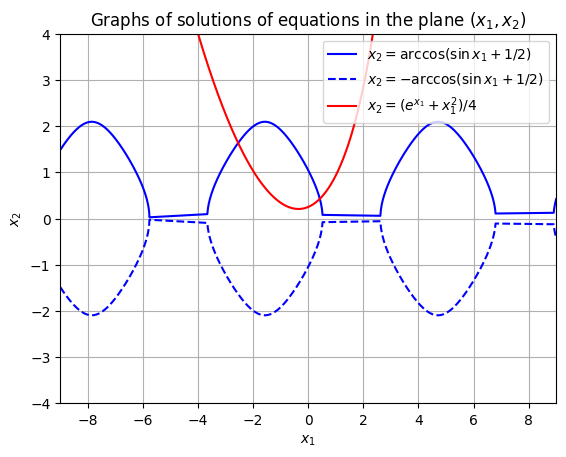

In [107]:
%matplotlib inline
# %matplotlib widget
plt.close()

def fun1(x: Tuple[float, float]) -> float:
    """2*sin(x1) - 2*cos(x2) + 1"""
    x1, x2 = x[0], x[1]
    return 2 * sin(x1) - 2 * cos(x2) + 1

def fun2(x: Tuple[float, float]) -> float:
    """4*x2 - exp(x1) - x1^2 """
    x1, x2 = x[0], x[1]
    return 4 * x2 - exp(x1) - x1**2

# J = [ 2*cos(x₁)    2*sin(x₂) ]
#     [ -exp(x₁)-2x₁   4      ]
def det_j(x: Tuple[float, float]) -> float:
    """
    J = <br>
    [ 2*cos(x₁)    2*sin(x₂) ] <br>
    [ -exp(x₁)-2x₁    4      ]
    """
    x1 = x[0]
    x2 = x[1]
    return 2 * cos(x1) * 4 - 2 * sin(x2) * (-exp(x1) - 2 * x1)

x1_min, x1_max = -9, 9
step = 0.01
x1_vals = []
x1 = x1_min
while x1 <= x1_max:
    x1_vals.append(x1)
    x1 += step

x2_from_eq1_pos = []
x2_from_eq1_neg = []
x1_valid_eq1 = []

x2_from_eq2 = []
x1_valid_eq2 = []

for x1 in x1_vals:
    x2_eq2 = (exp(x1) + x1**2) / 4.0
    x1_valid_eq2.append(x1)
    x2_from_eq2.append(x2_eq2)

    arg = sin(x1) + 0.5
    if -1 <= arg <= 1:
        try:
            val = acos(arg)
            x1_valid_eq1.append(x1)
            x2_from_eq1_pos.append(val)
            x2_from_eq1_neg.append(-val)
        except ValueError:
            pass

plt.plot(x1_valid_eq1, x2_from_eq1_pos, 'b', label=r'$x_2 = \arccos(\sin x_1 + 1/2)$')
plt.plot(x1_valid_eq1, x2_from_eq1_neg, 'b--', label=r'$x_2 = -\arccos(\sin x_1 + 1/2)$')

plt.plot(x1_valid_eq2, x2_from_eq2, 'r', label=r'$x_2 = (e^{x_1} + x_1^2)/4$')

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Graphs of solutions of equations in the plane $(x_1, x_2)$')
plt.legend(loc = 'upper right')
plt.grid()
plt.ylim(-4, 4)
plt.xlim(x1_min, x1_max)
plt.show()

***Метод Ньютона***

In [108]:
def newton_method_nes(
        a: Tuple[float, float], b: Tuple[float, float], eps: float = EPSILON,
        fun = [fun1, fun2], det= det_j) -> Tuple[float, float, int]:
    MAX_ITERATION = 1000
    xi = list(a)

    for i in range(MAX_ITERATION):
        f1 = fun[0](xi)
        f2 = fun[1](xi)
        det_value = det(xi)
        # обратимость определителя в точке
        if abs(det_value) < eps:
            raise ValueError("Method doesn't converge: det == 0")
        # xi(k+1) = xi(k) - detAi / detJ
        dx1 = -(f1 * 4 - f2 * 2 * sin(xi[1])) / det_value
        dx2 = -(2 * cos(xi[0]) * f2 - (-exp(xi[0]) - 2 * xi[0]) * f1) / det_value
        xi[0] += dx1
        xi[1] += dx2

        if abs(dx1) < eps and abs(dx2) < eps:
            return (xi[0], xi[1], i + 1)
        
        if not (min(a[0], b[0]) <= xi[0] <= max(a[0], b[0])) or \
            not (min(a[1], b[1]) <= xi[1] <= max(a[1], b[1])):
            raise ValueError("Method doesn't converge")
    return (xi[0], xi[1], MAX_ITERATION)


print("Newton's Method Results:")
print("=" * 60)
print(f"{'Root':<6} {'x₁':<15} {'x₂':<15} {'Iterations':<10}")
print("-" * 60)
print(f"{'1':<6} {(r1 := newton_method_nes((-3, 2), (-2, 1)))[0]:<15.8f} {r1[1]:<15.8f} {r1[2]:<10}")
print(f"{'2':<6} {(r2 := newton_method_nes((0, 0), (2, 1)))[0]:<15.8f} {r2[1]:<15.8f} {r2[2]:<10}")
print(f"diff_1 = {fun1(r1[:2]) - fun2(r1[:2])}")
print(f"diff_2 = {fun1(r2[:2]) - fun2(r2[:2])}")

Newton's Method Results:
Root   x₁              x₂              Iterations
------------------------------------------------------------
1      -2.54201383     1.63513552      4         
2      0.42297999      0.42635396      5         
diff_1 = 6.661338147750939e-16
diff_2 = 1.1102230246251565e-16


***Метод простой итерации***

In [109]:
def phi_x1(x: Tuple[float, float], _lambda: float = 1.0) -> float:
    """x1 - lambda * (2*sin(x1) - 2*cos(x2) + 1)"""
    return x[0] - _lambda *  fun1(x)

def phi_x2(x: Tuple[float, float], _lambda: float = 1.0) -> float:
    """x2 - lamda * (4*x2 - exp(x1) - x1^2)"""
    return x[1] - _lambda *  fun2(x)



def sufficient_condition_simple_nes(
        a: Tuple[float, float], b: Tuple[float, float],
        _lambda1: float = 1.0, _lambda2: float = 1.0) -> bool:
    """
    Φ'(x) = <br>
    [ 1 - λ₁·2·cos(x₁)   -λ₁·2·sin(x₂)] <br>
    [ -λ₂·(-exp(x₁)-2x₁)   1 - λ₂·4   ]
    """
    def fun(a: Tuple[float, float]) :
        # Кубическая норма (максимум суммы по строкам)
        row1 = abs(1 - _lambda1 * 2 * cos(a[0])) + abs(_lambda1 * 2 * sin(a[1]))
        row2 = abs(_lambda2 * (exp(a[0]) + 2 * a[0])) + abs(1 - _lambda2 * 4)
        if max(row1, row2) >= 1:
            # Норма якобиана phi должна быть меньше 1
            print(f"Warning: sufficient condition not satisfied.\nConvergence not guaranteed. ||Ф'|| = {max(row1, row2)} > 1")
            return False
        return True
    
    if not fun(a) or not fun(b):
        return False 
    return True

def simple_iteration_nes(
        a: Tuple[float, float], b: Tuple[float, float], _lambda1: float = 1.0, _lambda2: float = 1.0,
        phi=[phi_x1, phi_x2], eps: float = EPSILON) -> Tuple[float, float, int]:
    
    sufficient_condition_simple_nes(a, b, _lambda1, _lambda2)
    x1, x2 = a
    x1_old, x2_old = x1, x2
    MAX_ITERATION = 10000
    for i in range(MAX_ITERATION):
        x1 = phi_x1((x1_old, x2_old), _lambda1)
        x2 = phi_x2((x1_old, x2_old), _lambda2)
        if abs(x1 - x1_old) < eps and abs(x2 - x2_old) < eps:
            return (x1, x2, i + 1)
        x1_old, x2_old = x1, x2
    return (x1, x2, MAX_ITERATION)

print("Simple Iteration Method Results:")
print("=" * 60)
print(f"{'Root':<6} {'x₁':<15} {'x₂':<15} {'Iterations':<10}")
print("-" * 60)
print(f"{'1':<6} {(r1 := simple_iteration_nes((-3, 2), (-2, 1), -0.17, 0.17))[0]:<15.8f} {r1[1]:<15.8f} {r1[2]:<10}\n")
print(f"{'2':<6} {(r2 := simple_iteration_nes((0, 0), (2, 1), 0.3, 0.3))[0]:<15.8f} {r2[1]:<15.8f} {r2[2]:<10}\n")
print(f"diff_1 = {fun1(r1[:2]) - fun2(r1[:2])}")
print(f"diff_2 = {fun1(r2[:2]) - fun2(r2[:2])}")

Simple Iteration Method Results:
Root   x₁              x₂              Iterations
------------------------------------------------------------
Convergence not guaranteed. ||Ф'|| = 1.3315361983774632 > 1
1      -2.54201452     1.63513599      41        

Convergence not guaranteed. ||Ф'|| = 3.616716829679195 > 1
2      0.42297990      0.42635394      12        

diff_1 = 3.5927212042041745e-06
diff_2 = -3.1775632849950775e-07


***Метод Зейделя***

In [110]:
def seidel_nes(
        a: Tuple[float, float], b: Tuple[float, float], _lambda1: float = 1.0, _lambda2: float = 1.0,
        phi=[phi_x1, phi_x2], eps: float = EPSILON) -> Tuple[float, float, int]:
    
    sufficient_condition_simple_nes(a, b, _lambda1, _lambda2)
    x1, x2 = a
    MAX_ITERATION = 10000
    for i in range(MAX_ITERATION):
        x1_old, x2_old = x1, x2
        x1 = phi_x1((x1, x2), _lambda1)
        x2 = phi_x2((x1, x2), _lambda2)
        if abs(x1 - x1_old) < eps and abs(x2 - x2_old) < eps:
            return (x1, x2, i + 1)
    return (x1, x2, MAX_ITERATION)

print("Seidel Method Results:")
print("=" * 60)
print(f"{'Root':<6} {'x₁':<15} {'x₂':<15} {'Iterations':<10}")
print("-" * 60)
print(f"{'1':<6} {(r1 := seidel_nes((-3, 2), (-2, 1), -0.4, 0.17))[0]:<15.8f} {r1[1]:<15.8f} {r1[2]:<10}\n")
print(f"{'2':<6} {(r2 := seidel_nes((0, 0), (2, 1), 0.4, 0.2))[0]:<15.8f} {r2[1]:<15.8f} {r2[2]:<10}\n")
print(fun1(r1[:2]) - fun2(r1[:2]))
print(fun1(r2[:2]) - fun2(r2[:2]))

Seidel Method Results:
Root   x₁              x₂              Iterations
------------------------------------------------------------
Convergence not guaranteed. ||Ф'|| = 1.3315361983774632 > 1
1      -2.54201348     1.63513542      13        

Convergence not guaranteed. ||Ф'|| = 2.4778112197861297 > 1
2      0.42298027      0.42635396      10        

-2.148489884890026e-06
1.1574067196040705e-06
